In [ ]:
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
air_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [ ]:
air_passenger_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


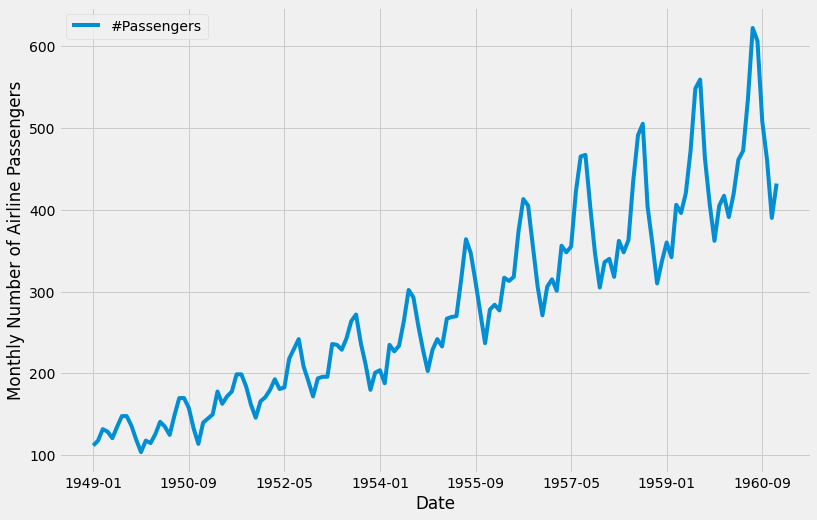

In [ ]:
plt.style.use('fivethirtyeight')
ax = air_passenger_data.set_index('Month').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

In [ ]:
my_model = Prophet(interval_width=.95)

In [ ]:
air_passenger_data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
my_model.fit(air_passenger_data)

ValueError: ignored

In [ ]:
air_passenger_data.rename(columns={"Month": "ds", "#Passengers": 'y'}, inplace=True)
air_passenger_data.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
my_model.fit(air_passenger_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.114534,605.885151,695.754375,577.430358,586.615677,67.401053,67.401053,67.401053,67.401053,67.401053,67.401053,0.0,0.0,0.0,649.515587
176,1963-09-01,585.228477,556.257768,646.522275,580.417870,589.915200,16.790416,16.790416,16.790416,16.790416,16.790416,16.790416,0.0,0.0,0.0,602.018893
177,1963-10-01,588.241970,523.273680,608.675957,583.197163,593.107201,-22.251148,-22.251148,-22.251148,-22.251148,-22.251148,-22.251148,0.0,0.0,0.0,565.990822
178,1963-11-01,591.355913,488.581944,576.061277,585.992824,596.423249,-57.324894,-57.324894,-57.324894,-57.324894,-57.324894,-57.324894,0.0,0.0,0.0,534.031018
179,1963-12-01,594.369406,519.663058,608.637151,588.710824,599.633423,-30.749146,-30.749146,-30.749146,-30.749146,-30.749146,-30.749146,0.0,0.0,0.0,563.620260


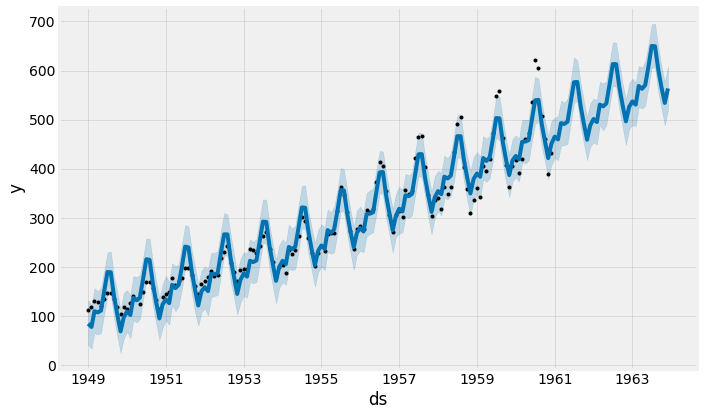

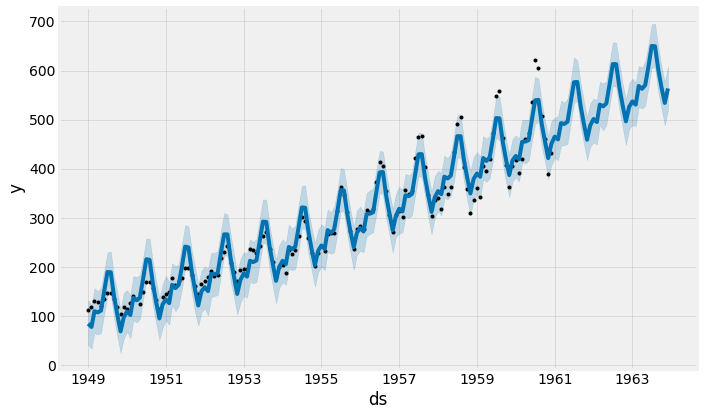

In [ ]:
my_model.plot(forecast)

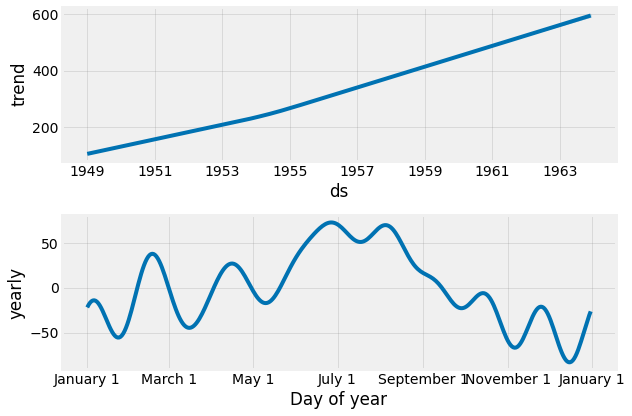

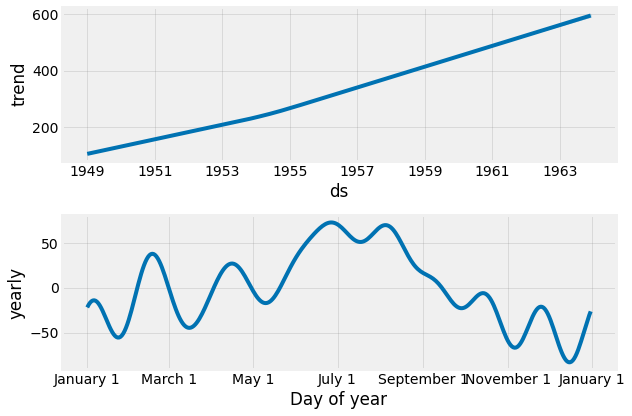

In [ ]:
my_model.plot_components(forecast)

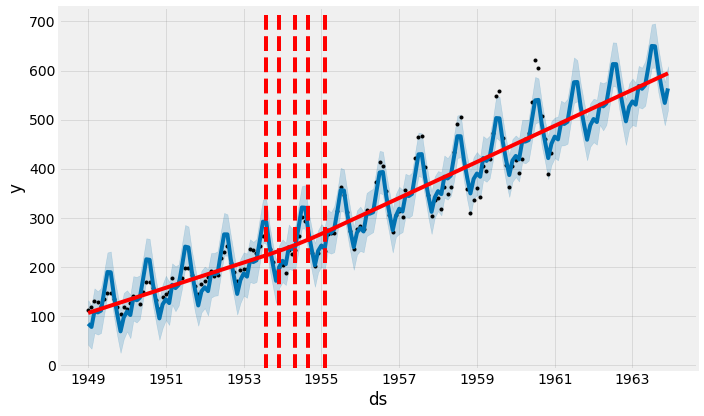

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig_air = my_model.plot(forecast)
a = add_changepoints_to_plot(fig_air.gca(), my_model, forecast)

In [ ]:
my_model_mult = Prophet(interval_width=.95, seasonality_mode='multiplicative')

In [ ]:
my_model_mult.fit(air_passenger_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = my_model_mult.predict(future_dates)

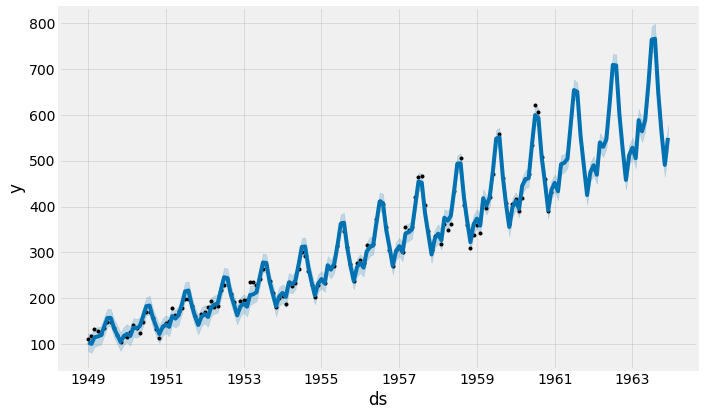

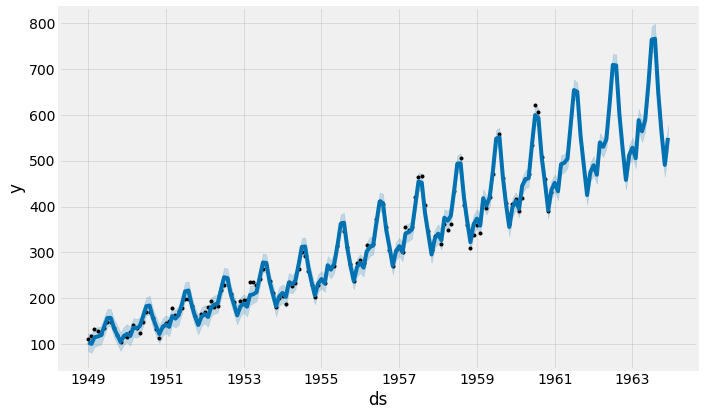

In [ ]:
my_model_mult.plot(forecast)